In [4]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
import math

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


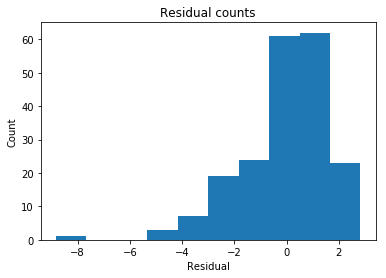

In [3]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

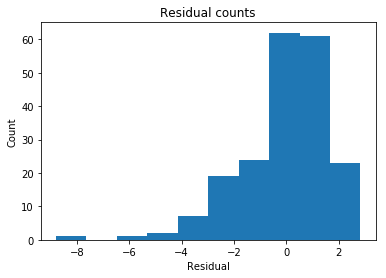

In [22]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

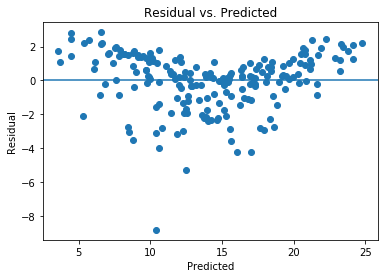

In [5]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

In [5]:
data.TV.max()

296.39999999999998

In [6]:
data.Sales.max()

27.0

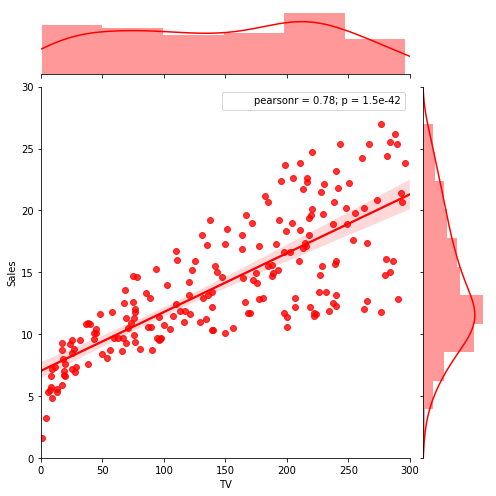

In [11]:
#It looks like there is a linear relationship between TV and Sales
#But Sales variance increases as the TV Sales increases 
g = sns.jointplot("TV", "Sales", data=data, kind="reg",
                  xlim=(0, 300), ylim=(0, 30), color="r", size=7)

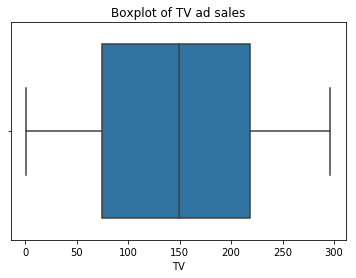

In [16]:
#Data looks somewhat normally distributed
x = data['TV']
plt.title('Boxplot of TV ad sales')
sns.boxplot(x)

In [12]:
data.Newspaper.max()

114.0

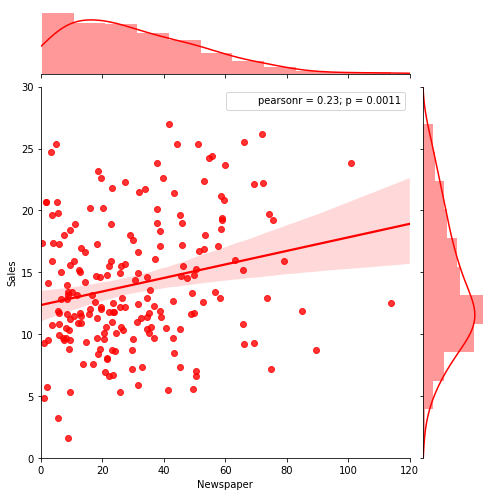

In [13]:
#There doesn't seem to be a linear relationship between Newspaper and Sales
#This variable is probably good candidate to be removed
g = sns.jointplot("Newspaper", "Sales", data=data, kind="reg",
                  xlim=(0, 120), ylim=(0, 30), color="r", size=7)

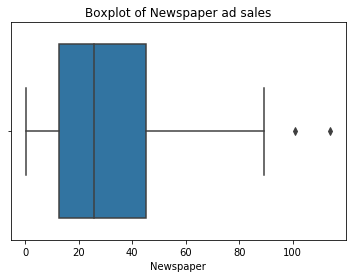

In [18]:
#Looks like the data is skewed to the right a little
x = data['Newspaper']
plt.title('Boxplot of Newspaper ad sales')
sns.boxplot(x)

In [14]:
data.Radio.max()

49.600000000000001

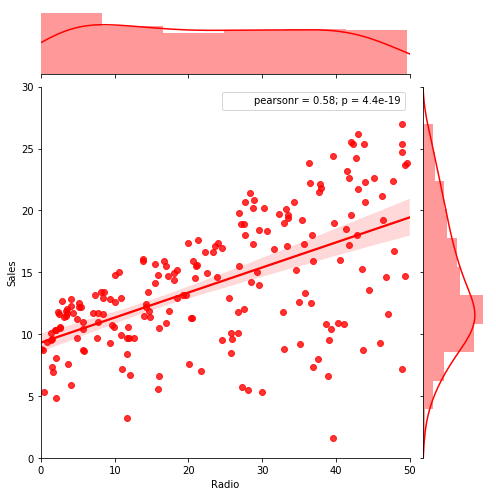

In [15]:
#There looks like there is a linear relationship related to Radio and Sales
#But Sales variance starts to increase the Radio sales increase
g = sns.jointplot("Radio", "Sales", data=data, kind="reg",
                  xlim=(0, 50), ylim=(0, 30), color="r", size=7)

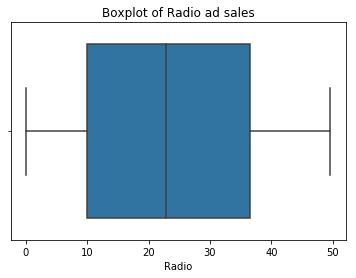

In [19]:
#Data looks normally distributed
x = data['Radio']
plt.title('Boxplot of Radio ad sales')
sns.boxplot(x)

In [32]:
#Try fitting the model to the natural logarithm of of 1 + x(base e)
data['Sales_log'] = data['Sales'].apply(lambda x : math.log1p(x))

In [33]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales_log'].values.reshape(-1, 1)
X = data[['TV','Radio']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.00335273  0.01127474]]

Intercept: 
 [ 1.88944487]

R-squared:
0.825865987472


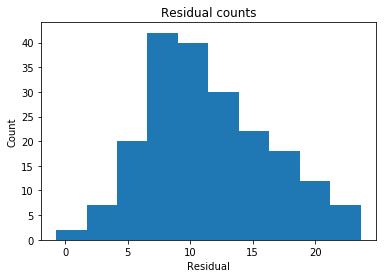

In [34]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a lot better than the original model.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

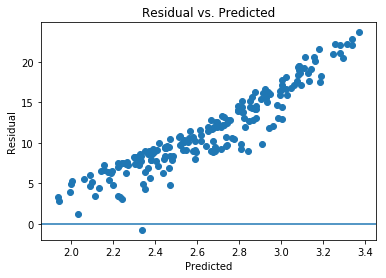

In [27]:
# The plot still doesn't look good...
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()